In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
import unicodedata
from nltk.corpus import stopwords

%matplotlib inline

nltk.download('stopwords')

# Exporting cvs file for the Philosophy Data dataset
df = pd.read_csv('philosophy_data.csv')
df.head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\breno\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea..."
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,-350,1997,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",surely -PRON- be not prosecute anyone before ...
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,-350,1997,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",the Athenians do not call this a prosecution ...
3,Plato - Complete Works,Plato,plato,What is this you say?,What is this you say?,-350,1997,21,what is this you say?,"['what', 'is', 'this', 'you', 'say']",what be this -PRON- say ?
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...","Someone must have indicted you, for you are no...",-350,1997,101,"someone must have indicted you, for you are no...","['someone', 'must', 'have', 'indicted', 'you',...","someone must have indict -PRON- , for -PRON- ..."
5,Plato - Complete Works,Plato,plato,But someone else has indicted you?,But someone else has indicted you?,-350,1997,34,but someone else has indicted you?,"['but', 'someone', 'else', 'has', 'indicted', ...",but someone else have indict -PRON- ?
6,Plato - Complete Works,Plato,plato,"I do not really know him myself, Euthyphro.","I do not really know him myself, Euthyphro.",-350,1997,43,"i do not really know him myself, euthyphro.","['do', 'not', 'really', 'know', 'him', 'myself...","-PRON- do not really know -PRON- -PRON- , Eut..."
7,Plato - Complete Works,Plato,plato,He is apparently young and unknown.,He is apparently young and unknown.,-350,1997,35,he is apparently young and unknown.,"['he', 'is', 'apparently', 'young', 'and', 'un...",-PRON- be apparently young and unknown .
8,Plato - Complete Works,Plato,plato,"They call him Meletus, I believe.","They call him Meletus, I believe.",-350,1997,33,"they call him meletus, i believe.","['they', 'call', 'him', 'meletus', 'believe']","-PRON- call -PRON- Meletus , -PRON- believe ."
9,Plato - Complete Works,Plato,plato,"He belongs to the Pitthean deme, if you know a...","He belongs to the Pitthean deme, if you know a...",-350,1997,147,"he belongs to the pitthean deme, if you know a...","['he', 'belongs', 'to', 'the', 'pitthean', 'de...","-PRON- belong to the Pitthean deme , if -PRON..."


In [2]:
len(df)

360808

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360808 entries, 0 to 360807
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   title                      360808 non-null  object
 1   author                     360808 non-null  object
 2   school                     360808 non-null  object
 3   sentence_spacy             360808 non-null  object
 4   sentence_str               360808 non-null  object
 5   original_publication_date  360808 non-null  int64 
 6   corpus_edition_date        360808 non-null  int64 
 7   sentence_length            360808 non-null  int64 
 8   sentence_lowered           360808 non-null  object
 9   tokenized_txt              360808 non-null  object
 10  lemmatized_str             360808 non-null  object
dtypes: int64(3), object(8)
memory usage: 30.3+ MB


In [4]:
df.duplicated().any()

False

In [5]:
df = df[['title', 'author', 'school', 'sentence_lowered', 'original_publication_date', 'sentence_length']]
df.head(5)

,title,author,school,sentence_lowered,original_publication_date,sentence_length
0,Plato - Complete Works,Plato,plato,"what's new, socrates, to make you leave your ...",-350,125
1,Plato - Complete Works,Plato,plato,surely you are not prosecuting anyone before t...,-350,69
2,Plato - Complete Works,Plato,plato,the athenians do not call this a prosecution b...,-350,74
3,Plato - Complete Works,Plato,plato,what is this you say?,-350,21
4,Plato - Complete Works,Plato,plato,"someone must have indicted you, for you are no...",-350,101


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360808 entries, 0 to 360807
Data columns (total 6 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   title                      360808 non-null  object
 1   author                     360808 non-null  object
 2   school                     360808 non-null  object
 3   sentence_lowered           360808 non-null  object
 4   original_publication_date  360808 non-null  int64 
 5   sentence_length            360808 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 16.5+ MB


In [7]:
df.describe()

,original_publication_date,sentence_length
count,360808.000000,360808.000000
mean,1326.800908,150.790964
std,951.492193,104.822072
min,-350.000000,20.000000
25%,1641.000000,75.000000
50%,1817.000000,127.000000
75%,1949.000000,199.000000
max,1985.000000,2649.000000


<AxesSubplot:>

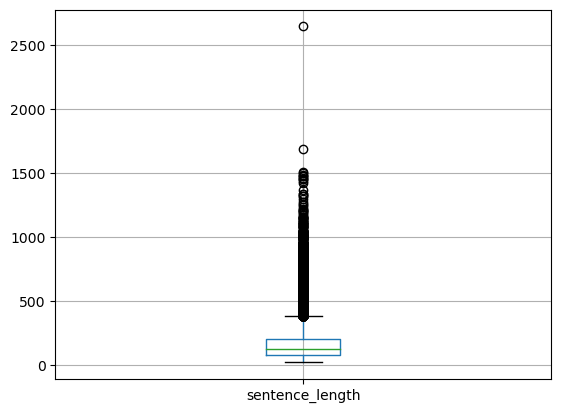

In [8]:
df.boxplot(column=['sentence_length'])

<AxesSubplot:ylabel='Density'>

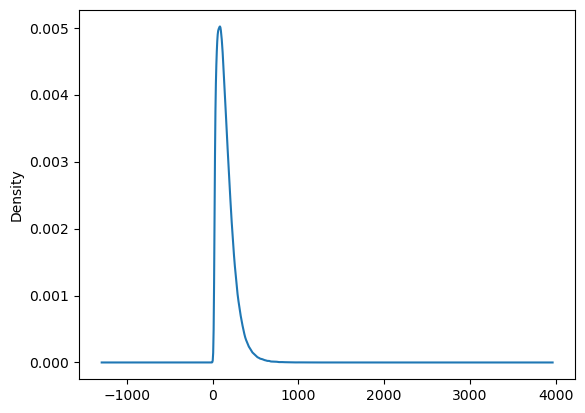

In [9]:
df['sentence_length'].plot.kde()

<AxesSubplot:>

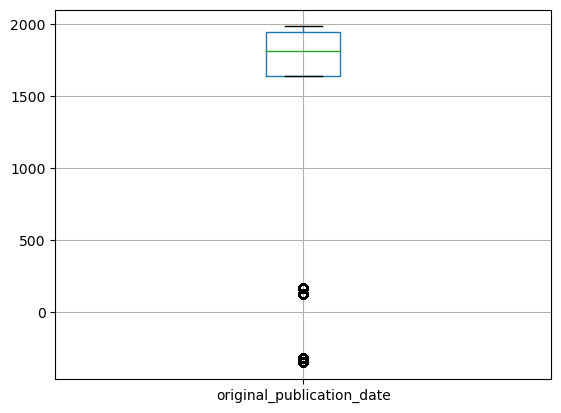

In [10]:
df.boxplot(column=['original_publication_date'])

<AxesSubplot:ylabel='Density'>

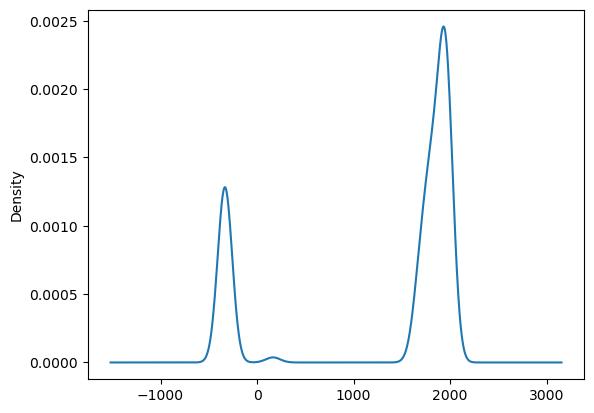

In [11]:
df['original_publication_date'].plot.kde()

<AxesSubplot:>

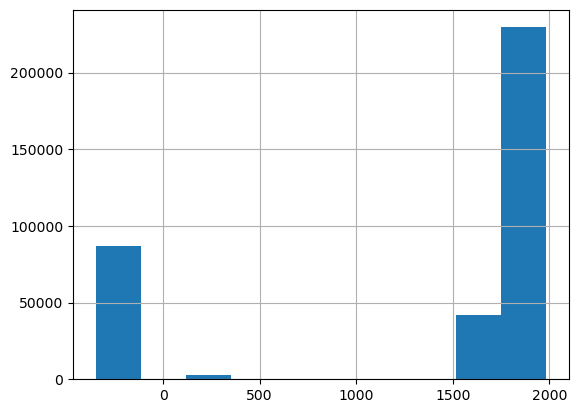

In [13]:
df['original_publication_date'].hist()

In [86]:
philosophers = df['author'].unique()
philosophers

array(['Plato', 'Aristotle', 'Locke', 'Hume', 'Berkeley', 'Spinoza',
       'Leibniz', 'Descartes', 'Malebranche', 'Russell', 'Moore',
       'Wittgenstein', 'Lewis', 'Quine', 'Popper', 'Kripke', 'Foucault',
       'Derrida', 'Deleuze', 'Merleau-Ponty', 'Husserl', 'Heidegger',
       'Kant', 'Fichte', 'Hegel', 'Marx', 'Lenin', 'Smith', 'Ricardo',
       'Keynes', 'Epictetus', 'Marcus Aurelius', 'Nietzsche',
       'Wollstonecraft', 'Beauvoir', 'Davis'], dtype=object)

In [87]:
len(philosophers)

36

In [88]:
schools = df['school'].unique()
schools

array(['plato', 'aristotle', 'empiricism', 'rationalism', 'analytic',
       'continental', 'phenomenology', 'german_idealism', 'communism',
       'capitalism', 'stoicism', 'nietzsche', 'feminism'], dtype=object)

In [89]:
len(schools)

13

In [90]:
titles = df['title'].unique()
titles

array(['Plato - Complete Works', 'Aristotle - Complete Works',
       'Second Treatise On Government',
       'Essay Concerning Human Understanding',
       'A Treatise Of Human Nature',
       'Dialogues Concerning Natural Religion', 'Three Dialogues',
       'A Treatise Concerning The Principles Of Human Knowledge',
       'Ethics', 'On The Improvement Of Understanding', 'Theodicy',
       'Discourse On Method', 'Meditations On First Philosophy',
       'The Search After Truth', 'The Analysis Of Mind',
       'The Problems Of Philosophy', 'Philosophical Studies',
       'Philosophical Investigations', 'Tractatus Logico-Philosophicus',
       'Lewis - Papers', 'Quintessence',
       'The Logic Of Scientific Discovery', 'Naming And Necessity',
       'Philosophical Troubles', 'On Certainty',
       'The Birth Of The Clinic', 'History Of Madness',
       'The Order Of Things', 'Writing And Difference',
       'Difference And Repetition', 'Anti-Oedipus',
       'The Phenomenology Of Perc

In [91]:
len(titles)

59

In [92]:
df['century'] = df['original_publication_date'].apply(lambda x: x // 100 + 1 if x >= 0 else x // 100) 
df.head(10)

,title,author,school,sentence_lowered,original_publication_date,sentence_length,century
0,Plato - Complete Works,Plato,plato,"what's new, socrates, to make you leave your ...",-350,125,-4
1,Plato - Complete Works,Plato,plato,surely you are not prosecuting anyone before t...,-350,69,-4
2,Plato - Complete Works,Plato,plato,the athenians do not call this a prosecution b...,-350,74,-4
3,Plato - Complete Works,Plato,plato,what is this you say?,-350,21,-4
4,Plato - Complete Works,Plato,plato,"someone must have indicted you, for you are no...",-350,101,-4
5,Plato - Complete Works,Plato,plato,but someone else has indicted you?,-350,34,-4
6,Plato - Complete Works,Plato,plato,"i do not really know him myself, euthyphro.",-350,43,-4
7,Plato - Complete Works,Plato,plato,he is apparently young and unknown.,-350,35,-4
8,Plato - Complete Works,Plato,plato,"they call him meletus, i believe.",-350,33,-4
9,Plato - Complete Works,Plato,plato,"he belongs to the pitthean deme, if you know a...",-350,147,-4


In [93]:
centuries = df['century'].unique()
centuries

array([-4, 17, 18, 20, 19,  2], dtype=int64)

In [94]:
century_group = df.groupby('century').size().sort_values(ascending=False)
century_group

century
 20    137264
-4      87145
 19     57296
 18     49761
 17     26807
 2       2535
dtype: int64

In [95]:
df_century = century_group.to_frame().reset_index()
df_century = df_century.rename(columns={0 : 'size'})
df_century

,century,size
0,20,137264
1,-4,87145
2,19,57296
3,18,49761
4,17,26807
5,2,2535


In [96]:
df_century['proportion'] = df_century['size'] / df_century['size'].sum()
df_century

,century,size,proportion
0,20,137264,0.380435
1,-4,87145,0.241527
2,19,57296,0.158799
3,18,49761,0.137915
4,17,26807,0.074297
5,2,2535,0.007026


<AxesSubplot:xlabel='century'>

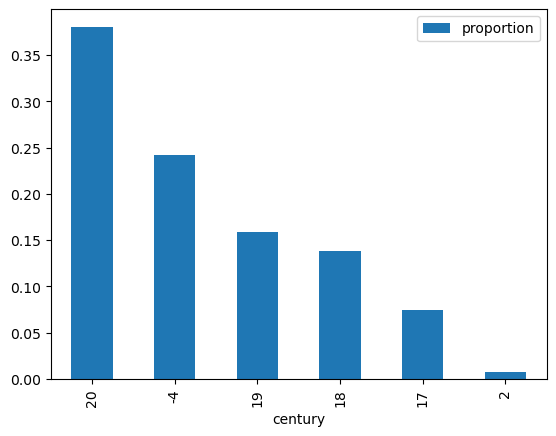

In [97]:
df_century.plot.bar(x='century', y='proportion')

<AxesSubplot:xlabel='century'>

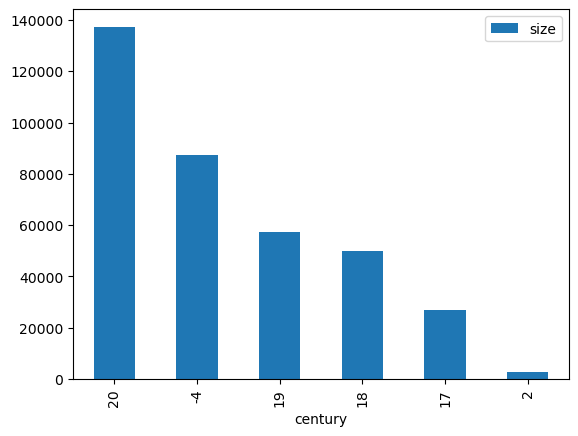

In [98]:
df_century.plot.bar(x='century', y='size')

In [99]:
author_group = df.groupby('author').size().sort_values(ascending=False)
author_group

author
Aristotle          48779
Plato              38366
Hegel              22700
Foucault           15240
Heidegger          15239
Kant               14128
Nietzsche          13548
Marx               13489
Lewis              13120
Beauvoir           13017
Malebranche        12997
Deleuze            12540
Kripke             12479
Smith              11693
Wittgenstein        9034
Locke               8885
Hume                8312
Merleau-Ponty       7592
Quine               7373
Derrida             5999
Husserl             5742
Fichte              5308
Russell             5073
Leibniz             5027
Popper              4678
Lenin               4469
Spinoza             3793
Moore               3668
Keynes              3411
Ricardo             3090
Davis               3059
Berkeley            2734
Wollstonecraft      2559
Marcus Aurelius     2212
Descartes           1132
Epictetus            323
dtype: int64

In [100]:
df_authors = author_group.to_frame().reset_index()
df_authors = df_authors.rename(columns={0 : 'size'})
df_authors

,author,size
0,Aristotle,48779
1,Plato,38366
2,Hegel,22700
3,Foucault,15240
4,Heidegger,15239
5,Kant,14128
6,Nietzsche,13548
7,Marx,13489
8,Lewis,13120
9,Beauvoir,13017


In [101]:
df_authors['proportion'] = df_authors['size'] / df_authors['size'].sum()
df_authors

,author,size,proportion
0,Aristotle,48779,0.135194
1,Plato,38366,0.106334
2,Hegel,22700,0.062914
3,Foucault,15240,0.042239
4,Heidegger,15239,0.042236
5,Kant,14128,0.039157
6,Nietzsche,13548,0.037549
7,Marx,13489,0.037386
8,Lewis,13120,0.036363
9,Beauvoir,13017,0.036077


In [102]:
df_authors.describe()

,size,proportion
count,36.000000,36.000000
mean,10022.444444,0.027778
std,9784.192994,0.027117
min,323.000000,0.000895
25%,3761.750000,0.010426
50%,7482.500000,0.020738
75%,13042.750000,0.036149
max,48779.000000,0.135194


<AxesSubplot:>

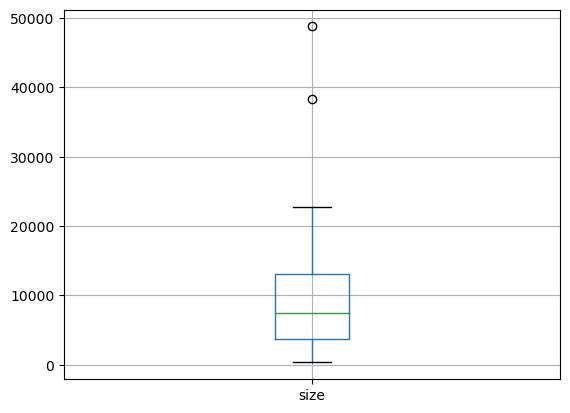

In [103]:
df_authors.boxplot(column=['size'])

<AxesSubplot:xlabel='author'>

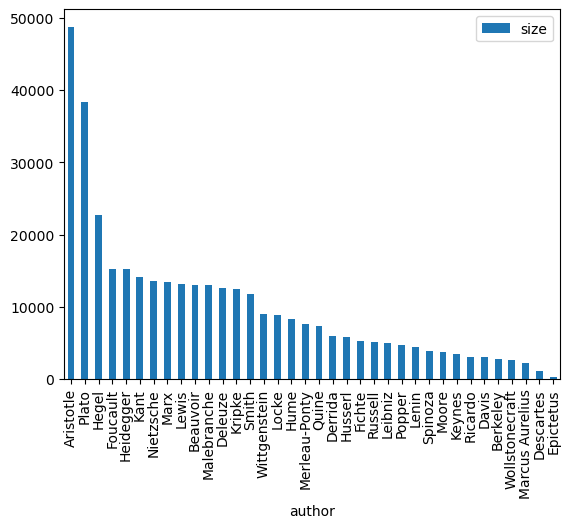

In [104]:
df_authors.plot.bar(x='author', y='size')

In [105]:
school_group = df.groupby('school').size().sort_values(ascending=False)
school_group

school
analytic           55425
aristotle          48779
german_idealism    42136
plato              38366
continental        33779
phenomenology      28573
rationalism        22949
empiricism         19931
feminism           18635
capitalism         18194
communism          17958
nietzsche          13548
stoicism            2535
dtype: int64

In [106]:
df_schools = school_group.to_frame().reset_index()
df_schools = df_schools.rename(columns={0 : 'size'})
df_schools

,school,size
0,analytic,55425
1,aristotle,48779
2,german_idealism,42136
3,plato,38366
4,continental,33779
5,phenomenology,28573
6,rationalism,22949
7,empiricism,19931
8,feminism,18635
9,capitalism,18194


In [107]:
df_schools['proportion'] = df_schools['size'] / df_schools['size'].sum()
df_schools

,school,size,proportion
0,analytic,55425,0.153614
1,aristotle,48779,0.135194
2,german_idealism,42136,0.116782
3,plato,38366,0.106334
4,continental,33779,0.093620
5,phenomenology,28573,0.079192
6,rationalism,22949,0.063604
7,empiricism,19931,0.055240
8,feminism,18635,0.051648
9,capitalism,18194,0.050426


In [108]:
df_schools.describe()

,size,proportion
count,13.000000,13.000000
mean,27754.461538,0.076923
std,15156.873703,0.042008
min,2535.000000,0.007026
25%,18194.000000,0.050426
50%,22949.000000,0.063604
75%,38366.000000,0.106334
max,55425.000000,0.153614


<AxesSubplot:>

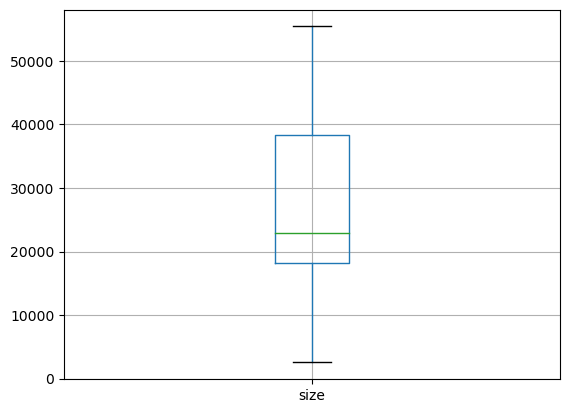

In [109]:
df_schools.boxplot(column=['size'])

<AxesSubplot:xlabel='school'>

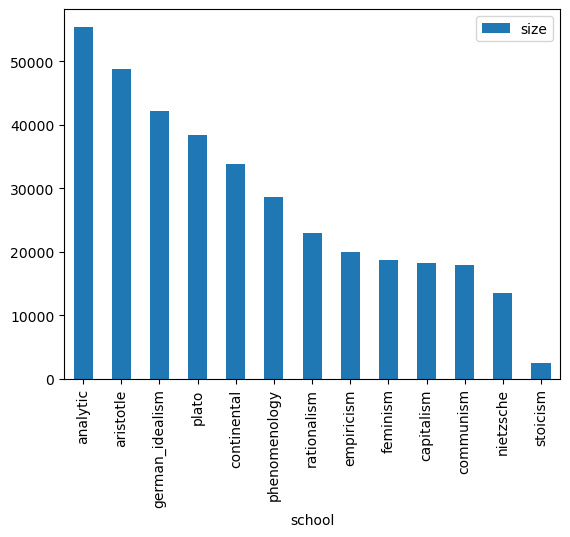

In [110]:
df_schools.plot.bar(x='school', y='size')

<AxesSubplot:ylabel='size'>

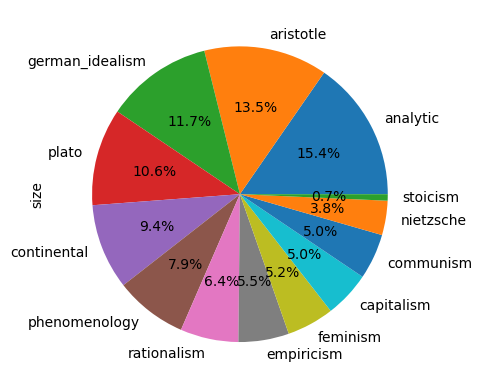

In [111]:
df_schools.plot.pie(y='size', labels=df_schools['school'], autopct='%1.1f%%', legend=False)

In [124]:
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [127]:
def normalize_text(txt):
    return ' '.join([word for word in word_tokenize(txt) if word not in stop_words and word.isalpha()])

df['normalized_sentence'] = df.apply(lambda row: normalize_text(str(row['sentence_lowered'])), axis = 1)

df

,title,author,school,sentence_lowered,original_publication_date,sentence_length,century,normalized_sentence
0,Plato - Complete Works,Plato,plato,"what's new, socrates, to make you leave your ...",-350,125,-4,new socrates make leave usual haunts lyceum sp...
1,Plato - Complete Works,Plato,plato,surely you are not prosecuting anyone before t...,-350,69,-4,surely prosecuting anyone king archon
2,Plato - Complete Works,Plato,plato,the athenians do not call this a prosecution b...,-350,74,-4,athenians call prosecution indictment euthyphro
3,Plato - Complete Works,Plato,plato,what is this you say?,-350,21,-4,say
4,Plato - Complete Works,Plato,plato,"someone must have indicted you, for you are no...",-350,101,-4,someone must indicted going tell indicted some...
...,...,...,...,...,...,...,...,...
360803,"Women, Race, And Class",Davis,feminism,but the socialization of housework including m...,1981,142,20,socialization housework including meal prepara...
360804,"Women, Race, And Class",Davis,feminism,the only significant steps toward endingdomest...,1981,117,20,significant steps toward endingdomestic slaver...
360805,"Women, Race, And Class",Davis,feminism,"working women, therefore, have a special and v...",1981,90,20,working women therefore special vital interest...
360806,"Women, Race, And Class",Davis,feminism,"moreover, under capitalism, campaigns for jobs...",1981,199,20,moreover capitalism campaigns jobs equal basis...


In [129]:
df['normalized_words_count'] = df['normalized_sentence'].apply(lambda word: len(word.split()))
df.head(5)

,title,author,school,sentence_lowered,original_publication_date,sentence_length,century,normalized_sentence,normalized_words_count
0,Plato - Complete Works,Plato,plato,"what's new, socrates, to make you leave your ...",-350,125,-4,new socrates make leave usual haunts lyceum sp...,12
1,Plato - Complete Works,Plato,plato,surely you are not prosecuting anyone before t...,-350,69,-4,surely prosecuting anyone king archon,5
2,Plato - Complete Works,Plato,plato,the athenians do not call this a prosecution b...,-350,74,-4,athenians call prosecution indictment euthyphro,5
3,Plato - Complete Works,Plato,plato,what is this you say?,-350,21,-4,say,1
4,Plato - Complete Works,Plato,plato,"someone must have indicted you, for you are no...",-350,101,-4,someone must indicted going tell indicted some...,8


In [130]:
df.describe()

,original_publication_date,sentence_length,century,normalized_words_count
count,360808.000000,360808.000000,360808.000000,360808.000000
mean,1326.800908,150.790964,13.419356,12.071440
std,951.492193,104.822072,9.973499,8.370468
min,-350.000000,20.000000,-4.000000,0.000000
25%,1641.000000,75.000000,17.000000,6.000000
50%,1817.000000,127.000000,19.000000,10.000000
75%,1949.000000,199.000000,20.000000,16.000000
max,1985.000000,2649.000000,20.000000,217.000000


<AxesSubplot:>

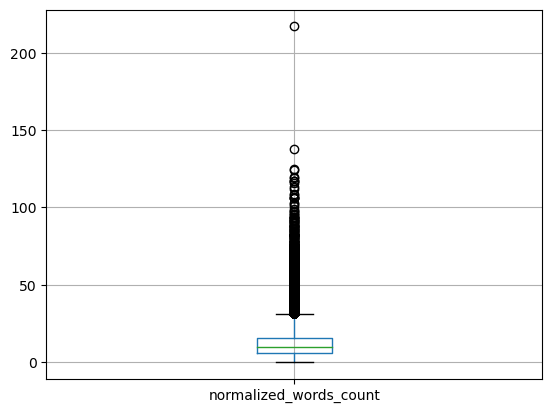

In [131]:
df.boxplot(column=['normalized_words_count'])

<AxesSubplot:ylabel='Density'>

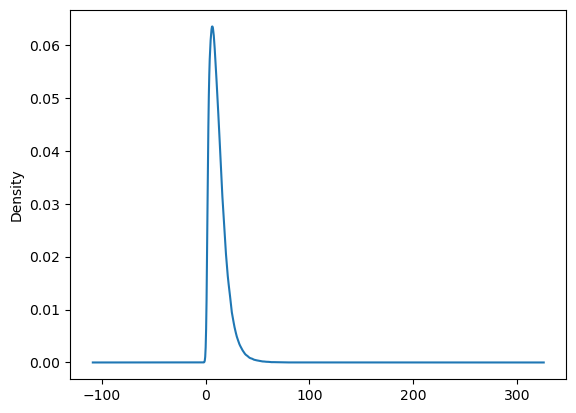

In [138]:
df['normalized_words_count'].plot.kde()

In [139]:
df_word_school = df.groupby('school')['normalized_sentence'].apply(lambda x: ' '.join(x))
df_word_school['plato']

'new socrates make leave usual haunts lyceum spend time king archon court surely prosecuting anyone king archon athenians call prosecution indictment euthyphro say someone must indicted going tell indicted someone else someone else indicted really know euthyphro apparently young unknown call meletus believe belongs pitthean deme know anyone deme called meletus long hair much beard rather aquiline nose know socrates charge bring ignoble one think small thing young man knowledge important subject says knows young men corrupted corrupts likely wise sees ignorance corrupting contemporaries proceeds accuse city mother think one public men start right way right care first young good possible good farmer likely take care young plants first others later meletus first gets rid us corrupt young shoots says afterwards obviously take care older ones become source great blessings city seems likely happen one started way could wish true socrates fear opposite may happen seems start harming heart eut

In [140]:
df_word_school

school
analytic           book grown attempt harmonize two different ten...
aristotle          things name common definition corresponds name...
capitalism         annual labour every nation fund originally sup...
communism          wealth societies capitalist mode production pr...
continental        us human body defines natural right space orig...
empiricism         reader thou hast beginning end discourse conce...
feminism           read great pleasure pamphlet lately published ...
german_idealism    critique titled critique pure practical reason...
nietzsche          book belongs rare men perhaps one yet alive po...
phenomenology      phenomenology may seem strange question still ...
plato              new socrates make leave usual haunts lyceum sp...
rationalism        self caused mean essence involves existence na...
stoicism           things within power things beyond power within...
Name: normalized_sentence, dtype: object

analytic


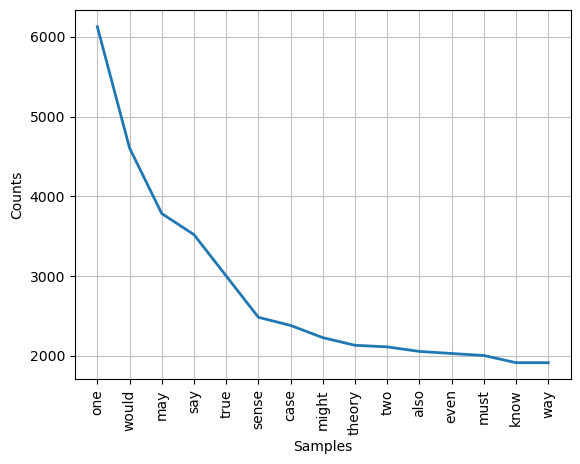

aristotle


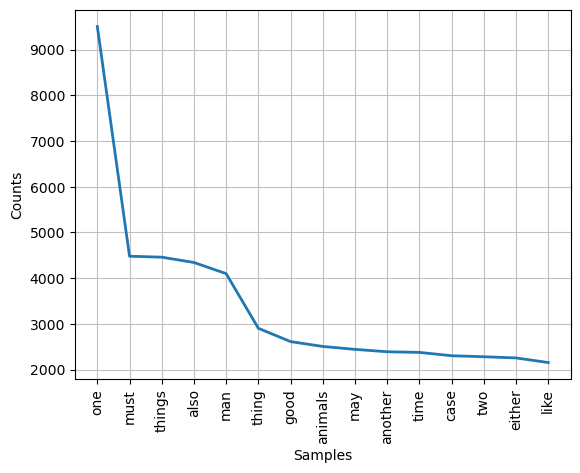

capitalism


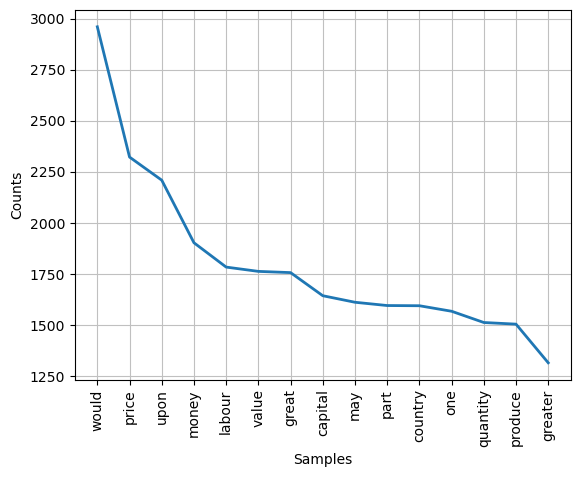

communism


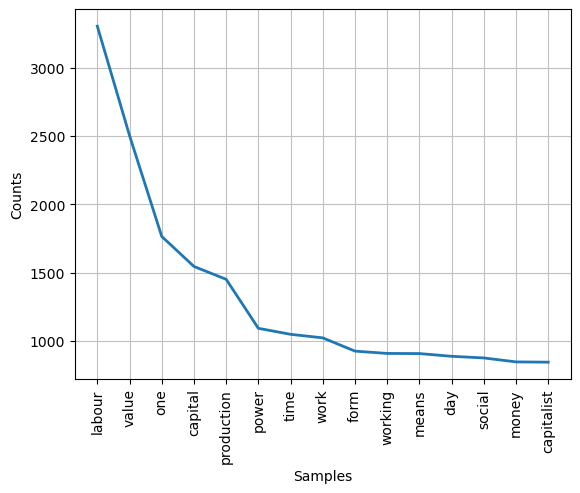

continental


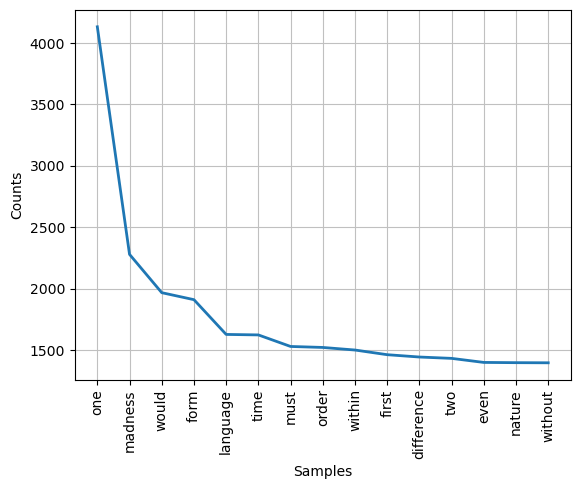

empiricism


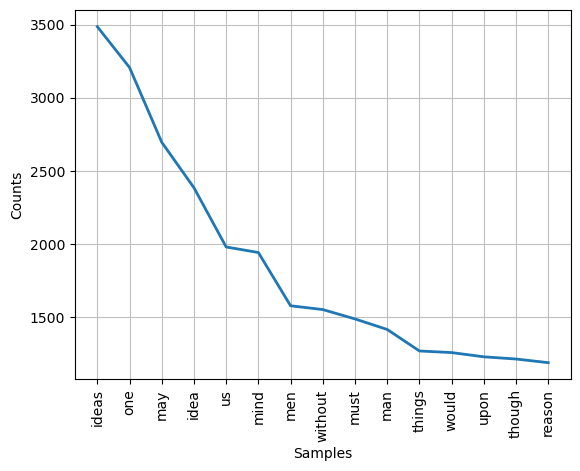

feminism


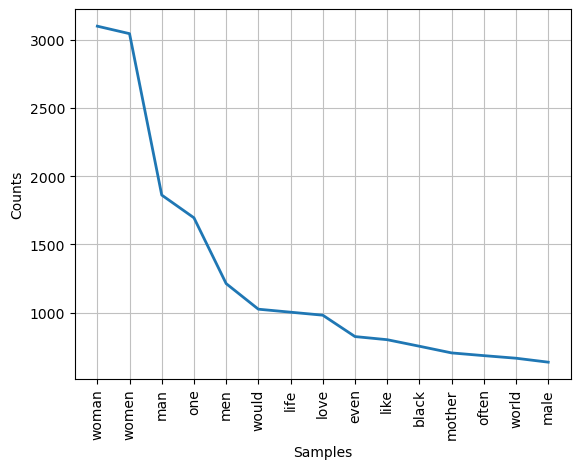

german_idealism


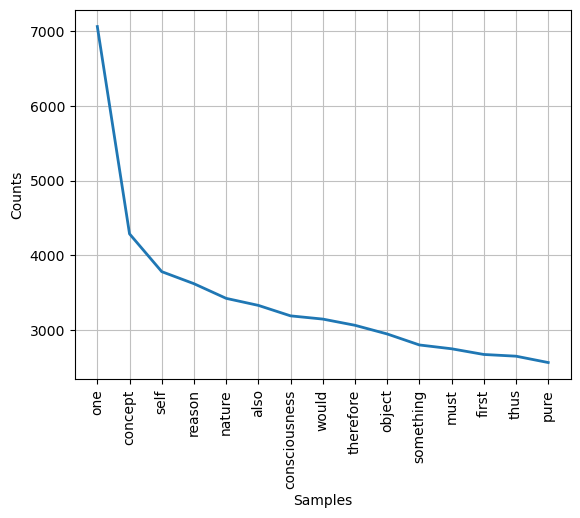

nietzsche


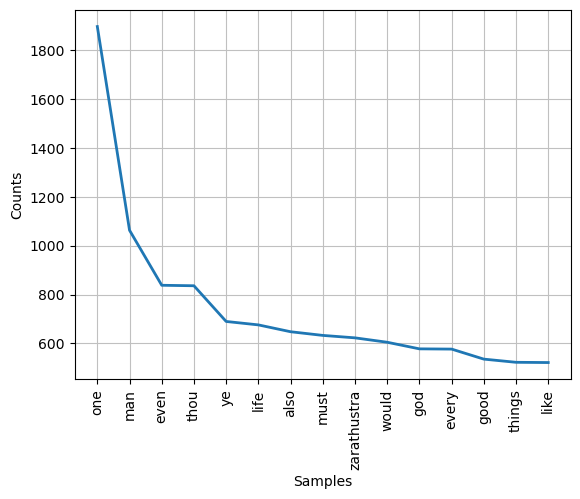

phenomenology


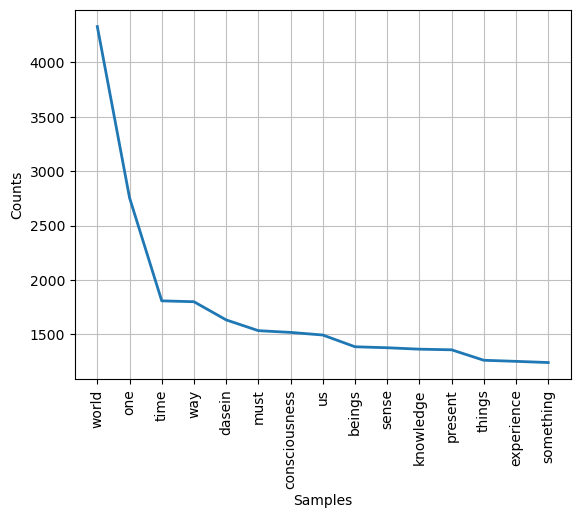

plato


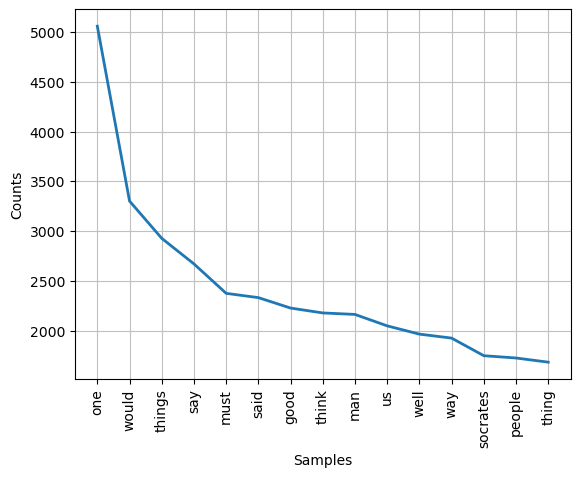

rationalism


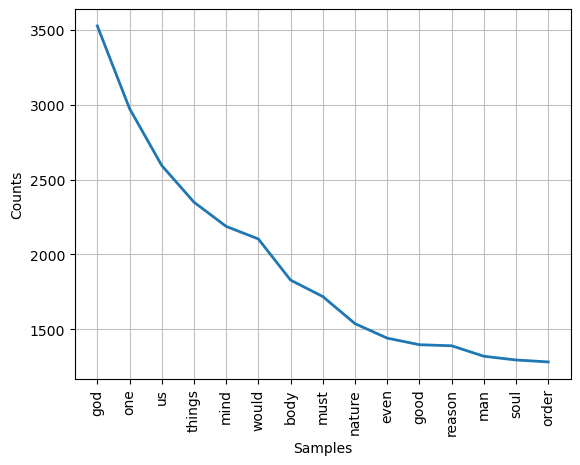

stoicism


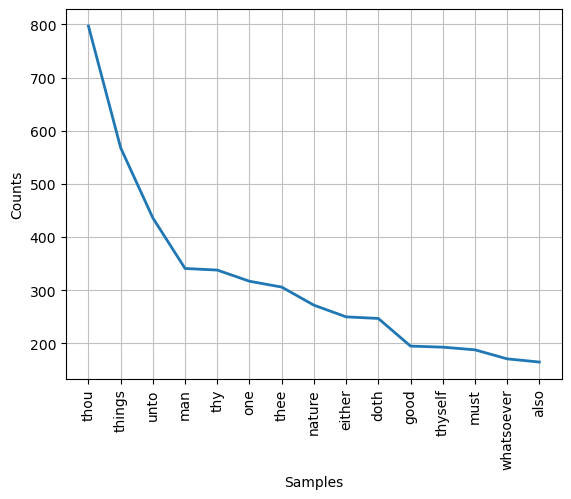

In [143]:
from nltk.probability import FreqDist

for school, text in df_word_school.items():
    print(school)
    freqDist = FreqDist(text.split(" "))
    freqDist.plot(15)

In [144]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\breno\AppData\Roaming\nltk_data...


True

In [145]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [146]:
sid = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    scores = sid.polarity_scores(text)
    return scores['compound']

df['sentiment_score'] = df['sentence_lowered'].apply(lambda x: get_sentiment_score(x))

df.head(5)

,title,author,school,sentence_lowered,original_publication_date,sentence_length,century,normalized_sentence,normalized_words_count,sentiment_score
0,Plato - Complete Works,Plato,plato,"what's new, socrates, to make you leave your ...",-350,125,-4,new socrates make leave usual haunts lyceum sp...,12,-0.2960
1,Plato - Complete Works,Plato,plato,surely you are not prosecuting anyone before t...,-350,69,-4,surely prosecuting anyone king archon,5,0.4404
2,Plato - Complete Works,Plato,plato,the athenians do not call this a prosecution b...,-350,74,-4,athenians call prosecution indictment euthyphro,5,-0.3346
3,Plato - Complete Works,Plato,plato,what is this you say?,-350,21,-4,say,1,0.0000
4,Plato - Complete Works,Plato,plato,"someone must have indicted you, for you are no...",-350,101,-4,someone must indicted going tell indicted some...,8,0.0000


In [147]:
df.describe()

,original_publication_date,sentence_length,century,normalized_words_count,sentiment_score
count,360808.000000,360808.000000,360808.000000,360808.000000,360808.000000
mean,1326.800908,150.790964,13.419356,12.071440,0.108467
std,951.492193,104.822072,9.973499,8.370468,0.417136
min,-350.000000,20.000000,-4.000000,0.000000,-0.995000
25%,1641.000000,75.000000,17.000000,6.000000,0.000000
50%,1817.000000,127.000000,19.000000,10.000000,0.000000
75%,1949.000000,199.000000,20.000000,16.000000,0.421500
max,1985.000000,2649.000000,20.000000,217.000000,0.996900


<AxesSubplot:>

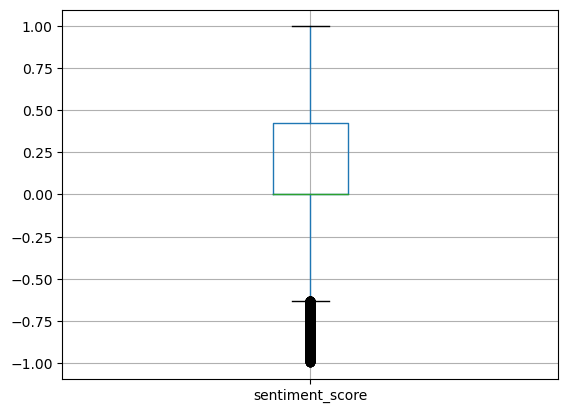

In [148]:
df.boxplot(column=['sentiment_score'])

<AxesSubplot:ylabel='Density'>

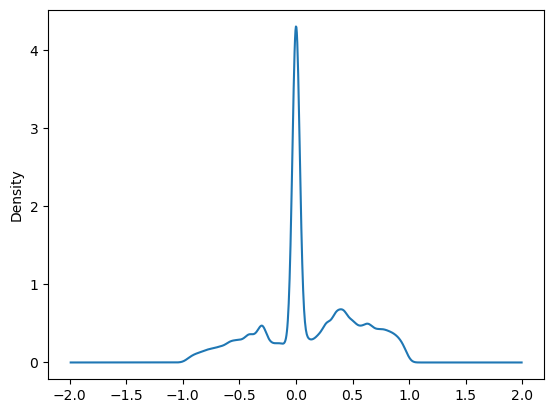

In [149]:
df['sentiment_score'].plot.kde()

In [152]:
from empath import Empath
lexicon = Empath()

In [157]:
category_dict = {}

def add_category(non_zero_dict, key):
    if key in category_dict:
        category_dict[key] += non_zero_dict[key]
    else:
        category_dict[key] = non_zero_dict[key]
        
def get_categories(original_dict):
    non_zero_dict = {k: v for k, v in original_dict.items() if v != 0.0}
    
    for key, value in non_zero_dict.items():
        add_category(non_zero_dict, key)
        
        
for index, row in df.iterrows():
    if index % 1000 == 0:
        print(index)
    original_dict = lexicon.analyze(row['sentence_lowered'])
    get_categories(original_dict)

category_dict

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


{'family': 14766.0,
 'vacation': 6133.0,
 'leisure': 6953.0,
 'royalty': 11533.0,
 'medieval': 4191.0,
 'traveling': 16805.0,
 'power': 32975.0,
 'optimism': 30147.0,
 'crime': 11251.0,
 'dispute': 26551.0,
 'stealing': 13079.0,
 'communication': 49367.0,
 'hearing': 14280.0,
 'speaking': 64419.0,
 'listen': 15456.0,
 'phone': 15966.0,
 'order': 29280.0,
 'youth': 6572.0,
 'children': 25959.0,
 'prison': 5250.0,
 'fight': 15463.0,
 'weapon': 4895.0,
 'giving': 30511.0,
 'masculine': 18370.0,
 'legend': 19161.0,
 'shape_and_size': 27161.0,
 'philosophy': 34039.0,
 'irritability': 2443.0,
 'healing': 21417.0,
 'trust': 37475.0,
 'farming': 5647.0,
 'negative_emotion': 43726.0,
 'rural': 6909.0,
 'positive_emotion': 46112.0,
 'deception': 12795.0,
 'poor': 6794.0,
 'law': 22740.0,
 'achievement': 22171.0,
 'aggression': 11061.0,
 'nervousness': 7310.0,
 'weakness': 5777.0,
 'horror': 5069.0,
 'suffering': 16492.0,
 'fear': 16419.0,
 'death': 13904.0,
 'neglect': 7214.0,
 'disgust': 9435.0

In [158]:
sorted_dict = dict(sorted(category_dict.items(), key=lambda x: x[1], reverse=True))
sorted_dict

{'speaking': 64419.0,
 'communication': 49367.0,
 'positive_emotion': 46112.0,
 'negative_emotion': 43726.0,
 'trust': 37475.0,
 'strength': 36850.0,
 'love': 34338.0,
 'philosophy': 34039.0,
 'power': 32975.0,
 'divine': 30883.0,
 'giving': 30511.0,
 'optimism': 30147.0,
 'school': 29689.0,
 'order': 29280.0,
 'economics': 28240.0,
 'shape_and_size': 27161.0,
 'business': 26911.0,
 'dispute': 26551.0,
 'children': 25959.0,
 'leader': 25738.0,
 'religion': 25651.0,
 'science': 25208.0,
 'valuable': 23731.0,
 'government': 22980.0,
 'reading': 22773.0,
 'law': 22740.0,
 'money': 22507.0,
 'achievement': 22171.0,
 'worship': 21821.0,
 'healing': 21417.0,
 'lust': 20768.0,
 'heroic': 20471.0,
 'party': 20379.0,
 'sadness': 20028.0,
 'college': 19498.0,
 'legend': 19161.0,
 'friends': 18512.0,
 'movement': 18463.0,
 'masculine': 18370.0,
 'banking': 17253.0,
 'contentment': 17132.0,
 'traveling': 16805.0,
 'suffering': 16492.0,
 'fear': 16419.0,
 'body': 16330.0,
 'beauty': 16067.0,
 'sham

In [159]:
top_20_cat = dict(list(sorted_dict.items())[:20])
top_20_cat

{'speaking': 64419.0,
 'communication': 49367.0,
 'positive_emotion': 46112.0,
 'negative_emotion': 43726.0,
 'trust': 37475.0,
 'strength': 36850.0,
 'love': 34338.0,
 'philosophy': 34039.0,
 'power': 32975.0,
 'divine': 30883.0,
 'giving': 30511.0,
 'optimism': 30147.0,
 'school': 29689.0,
 'order': 29280.0,
 'economics': 28240.0,
 'shape_and_size': 27161.0,
 'business': 26911.0,
 'dispute': 26551.0,
 'children': 25959.0,
 'leader': 25738.0}

In [162]:
df_top_20_cat = pd.DataFrame.from_dict(top_20_cat, orient='index', columns=['Total'])
df_top_20_cat.index.name = 'Category'
df_top_20_cat

,Total
Category,
speaking,64419.0
communication,49367.0
positive_emotion,46112.0
negative_emotion,43726.0
trust,37475.0
strength,36850.0
love,34338.0
philosophy,34039.0
power,32975.0


<AxesSubplot:xlabel='Category'>

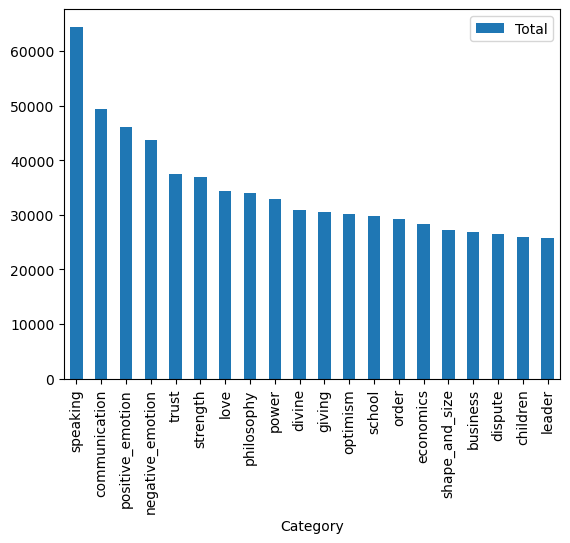

In [163]:
df_top_20_cat.plot.bar()